In [109]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

In [91]:
df = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv")

In [92]:
## remove unusable rows

df = df.iloc[4:]
df = df.iloc[:, :-1]
df = df[:-3]
df.columns = ['city', 'population', 'violentCrime', 'murder', 'revisedRape', 'legacyRape', 'robbery', 'assault',\
              'propertyCrime', 'burglary', 'theft', 'motorVehicleTheft', 'arson']

In [93]:
## check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 4 to 376
Data columns (total 13 columns):
city                 373 non-null object
population           369 non-null object
violentCrime         369 non-null object
murder               369 non-null object
revisedRape          227 non-null object
legacyRape           142 non-null object
robbery              369 non-null object
assault              369 non-null object
propertyCrime        368 non-null object
burglary             369 non-null object
theft                368 non-null object
motorVehicleTheft    369 non-null object
arson                365 non-null object
dtypes: object(13)
memory usage: 19.0+ KB


In [94]:
## remove commas so object values can be converted to numeric values
df['population'] = df['population'].str.replace(',', '')
df['violentCrime'] = df['violentCrime'].str.replace(',', '')
df['murder'] = df['murder'].str.replace(',', '')
df['revisedRape'] = df['revisedRape'].str.replace(',','')
df['legacyRape'] = df['legacyRape'].str.replace(',', '')
df['robbery'] = df['robbery'].str.replace(',', '')
df['assault'] = df['assault'].str.replace(',', '')
df['propertyCrime'] = df['propertyCrime'].str.replace(',', '')
df['burglary'] = df['burglary'].str.replace(',', '')
df['theft'] = df['theft'].str.replace(',', '')
df['motorVehicleTheft'] = df['motorVehicleTheft'].str.replace(',', '')
df['arson'] = df['arson'].str.replace(',', '')

In [95]:
## covert to numeric values
df['population'] = pd.to_numeric(df['population'])
df['violentCrime'] = pd.to_numeric(df['violentCrime'])
df['murder'] = pd.to_numeric(df['murder'])
df['revisedRape'] = pd.to_numeric(df['revisedRape'])
df['legacyRape'] = pd.to_numeric(df['legacyRape'])
df['robbery'] = pd.to_numeric(df['robbery'])
df['assault'] = pd.to_numeric(df['assault'])
df['propertyCrime'] = pd.to_numeric(df['propertyCrime'])
df['burglary'] = pd.to_numeric(df['burglary'])
df['theft'] = pd.to_numeric(df['theft'])
df['motorVehicleTheft'] = pd.to_numeric(df['motorVehicleTheft'])
df['arson'] = pd.to_numeric(df['arson'])

In [96]:
## Fill empty values with 0
df = df.fillna(0)

In [97]:
## Check data for accuracy of corrections
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 4 to 376
Data columns (total 13 columns):
city                 373 non-null object
population           373 non-null float64
violentCrime         373 non-null float64
murder               373 non-null float64
revisedRape          373 non-null float64
legacyRape           373 non-null float64
robbery              373 non-null float64
assault              373 non-null float64
propertyCrime        373 non-null float64
burglary             373 non-null float64
theft                373 non-null float64
motorVehicleTheft    373 non-null float64
arson                373 non-null float64
dtypes: float64(12), object(1)
memory usage: 36.5+ KB


### Original Linear Regression Equation
### property crime  = burglary + theft  + √arson

In [98]:
## create column for square root of arson data
df['arsonSqrt'] = np.sqrt(df['arson'])

In [117]:
## examine the f-value, p-values and R-squared value for our existing model
linear_formula = 'propertyCrime ~ burglary + theft + arsonSqrt'

lm = smf.ols(formula=linear_formula, data=df).fit()

pd.set_option('display.float_format', lambda x: '%.20f' % x)

print('f-value:',lm.fvalue)
print('p-value', lm.pvalues)
print('R-squared', lm.rsquared)

f-value: 23053266.2203423
p-value Intercept   0.00000030271631432771
burglary    0.00000000000000000000
theft       0.00000000000000000000
arsonSqrt   0.00000000000000003466
dtype: float64
R-squared 0.9999946645589147


### The f-value is very large which means that the likelihood that the variation we see is due to chance is very low.
### The p-values are all very low which again means that the likelihood that the variation that we see is due to chance is very low.
### The R-squared value is very high which means that the linear relationship between the features and property crime is very positive.
### These values are very close to perfect for our model but we will see if we can modify the model to get even better results

### Since burglary and theft were very highly correlated we will test the model with each alone with arson and compare them to our current equation

In [99]:
## preform linear regression with statsmodel
linear_formula = 'propertyCrime ~ burglary + theft + arsonSqrt'
linear_formula1 = 'propertyCrime ~  theft + arsonSqrt'
linear_formula2 = 'propertyCrime ~ burglary + arsonSqrt'

lm = smf.ols(formula=linear_formula, data=df).fit()
lm1 = smf.ols(formula=linear_formula1, data=df).fit()
lm2= smf.ols(formula=linear_formula2, data=df).fit()

In [104]:
## Check the coefficients
print('Original Iteration')
print(lm.params)
print('Theft and Arson Iteration')
print(lm1.params)
print('Burglary and Arson Iteration 3')
print(lm2.params)

Original Iteration
Intercept   -4.89515013371825347122
burglary     1.21678109303880499503
theft        1.03806405552592395658
arsonSqrt   -8.08136864962215817343
dtype: float64
Theft and Arson Iteration
Intercept   -17.15438788733781905194
theft         1.21271410882095209693
arsonSqrt    67.22776911510045749765
dtype: float64
Burglary and Arson Iteration 3
Intercept     75.07405982102780228615
burglary       8.31244867830954348165
arsonSqrt   -442.33100152263830295851
dtype: float64


In [118]:
## Check the p-values
print('Original Iteration')
print(lm.pvalues)
print('Theft and Arson Iteration')
print(lm1.pvalues)
print('Burglary and Arson Iteration 3')
print(lm2.pvalues)

Original Iteration
Intercept   0.00000030271631432771
burglary    0.00000000000000000000
theft       0.00000000000000000000
arsonSqrt   0.00000000000000003466
dtype: float64
Theft and Arson Iteration
Intercept   0.03520940288825370745
theft       0.00000000000000000000
arsonSqrt   0.00000000000000000003
dtype: float64
Burglary and Arson Iteration 3
Intercept   0.11437566475232452401
burglary    0.00000000000000000000
arsonSqrt   0.00000000000000000000
dtype: float64


### The p-values for all of the features is good for our Original Iteration and for the Theft and Arson Iteration. The p-value for the intercept for the Burglary and Arson Iteration is higher than ideal (>0.05), so this would not be a good model. We will look at the R-squared values next to determine which of the remain two models is best.

In [119]:
## Calculate the R-squared value
print('Original Iteration')
print(lm.rsquared)
print('Theft and Arson Iteration')
print(lm1.rsquared)

Original Iteration
0.9999946645589147
Theft and Arson Iteration
0.9995971412773221


### The Original Iteration has a very slightly higher R-squared value so we will use this for our Linear Regression model

In [61]:
## Calculate the confidence intervals to examine the range of the variables
pd.set_option('display.float_format', lambda x: '%.3f' % x)
lm.conf_int()

,0,1
Intercept,-6.740,-3.050
burglary,1.202,1.231
theft,1.036,1.040
arsonSqrt,-9.875,-6.288


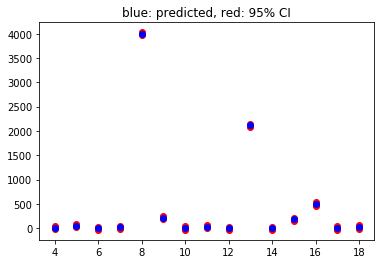

In [64]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

### The R-squared value and the p-values for this model are very good, so there is no need to change this model